### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


#### (1) What is the independent variable? What is the dependent variable?

In this case,
- Independent Variable: the congruency of the colour and text.
- Dependent Variable: Duration (time) to recognise the colours or the texts

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Ho: The Average time that the population spent in congruent tasks is equal to incongruent tasks. <br>
Ho: The Average time that the population spent in congruent tasks is equal or less than incongruent tasks.

$$
H0: \mu_{congruent} - \mu_{incongruent} \geqq 0 \\
H1: \mu_{congruent} - \mu_{incongruent} < 0 \\
\alpha = 0.05
$$

Notation:
- mu_incongruent refers to the average time that the population spent in incongruent tasks
- mu_congruent refers to the average time that the population spent in congruent tasks

Since we don't have population standards deviation and our sample size is very small, we should select:

"Two-sample dependent T-test: 1-tailed" for this question. We assume that the population is Normal.

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [31]:
df.shape

(24, 2)

In [32]:
# Perform the analysis here
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Descriptive Statistics
Congruent: 
- mean = 14.05
- std = 3.56

Incongruent:
- mean = 22.015917
- std = 4.797057

**We can see that the Incongruent data has higher mean time spent and larger variability compared to Congruent data.**

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

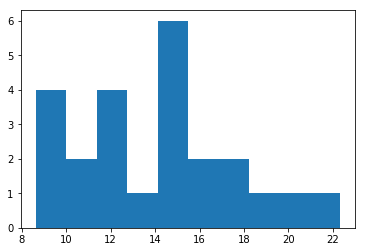

In [33]:
# Congruent Data
plt.hist(df['Congruent']);

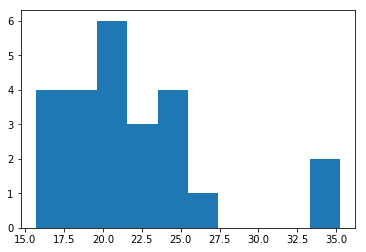

In [34]:
# Incongruent Data
plt.hist(df['Incongruent']);

**
We can see that the Incongruent data is more divergent with higher value of time spent and Congruent data is more condensed and has lower value of time spent.
**

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [41]:
# Perform the statistical test here
from scipy.stats import ttest_rel
# Note: ttest_rel is for 2-tailed dependent t-test

incongruent = df['Incongruent']
congruent = df['Congruent']

t_stat, p = ttest_rel(incongruent, congruent)
print(t_stat, p)

8.02070694411 4.10300058571e-08


In [44]:
# Calculate p/2
p/2

2.0515002928555891e-08

The one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue) As a result, given p and t values from a two-tailed test, we could reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0. 

In this case, as  `p/2 = 2.05e-08 < alpha = 0.05` and `t-score = 8.02 > 0 `,  we have strong evidence to reject the null hypothesis. To sum up, we have 95% confidence that the average time spent in incongruent group is larger than the average time spent in congruent group.

#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think Mental model: "stereotype" is responsible for the effects that we observed, our brain has linked the color with the vocabulary so as to simplify the calculating process.

Similar example is a game that you have to speak out the number of the gesture(from 1-9) that your previous player showed and show a gesture different to what you said. You will often find yourself end up having the same gesture for the number that you spoke.

#### Reference

- <a href="http://web.ntpu.edu.tw/~stou/class/ntpu/CH11-Keller-in-Chinese-2011.pdf">
    Oveweview of Null & Alternative Hypothesis (Chinese) 
</a>

- <a href="https://stats.stackexchange.com/questions/85804/choosing-between-z-test-and-t-test">
    Choosing between z-test and t-test
</a>

- <a href="http://charngro.blogspot.tw/2016/01/blog-post_24.html">
    Inferential Statistics (Chinese)
</a>

- <a href="https://learn5.open.ac.uk/pluginfile.php/103/mod_resource/content/1/How%20to%20use%20the%20T-test.pdf">
    How to use the t-Test
</a>

- <a href="https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy">
   2 Sample, 1 Tailed t-test
</a>
